# EDA – 大安區

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [100]:
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

### Load the data

In [101]:
# Load the data
data = pd.read_csv('data/cleaned_data.csv')
daan_data = data[data['行政區_大安區'] == 1]

# Drop the columns that are not needed
daan_data = daan_data.drop(columns = ['行政區_中山區','行政區_中正區','行政區_信義區','行政區_內湖區','行政區_北投區','行政區_南港區','行政區_士林區','行政區_大同區','行政區_大安區','行政區_文山區','行政區_松山區','行政區_萬華區'])
daan_data.head()

,土地移轉總面積平方公尺,交易年月日,總樓層數,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,單價元平方公尺,...,車位,建物年齡,都市土地使用分區_商,都市土地使用分區_工,都市土地使用分區_農,都市土地使用分區_都市,主要建材_加強磚造,主要建材_鋼筋混凝土造,主要建材_鋼骨造,主要建材_鋼骨鋼筋混凝土造
11,36.93,1100101,6,154.21,4,2,2,1,1,237728.0,...,0,13868,0,0,0,0,0,1,0,0
77,17.43,1100103,6,86.96,1,1,1,1,0,270239.0,...,0,8570,0,0,0,0,0,1,0,0
79,22.55,1100103,16,264.96,3,2,2,1,1,263738.0,...,1,14566,0,0,0,0,0,1,0,0
100,25.00,1100103,10,213.74,6,1,2,1,0,220735.0,...,0,14559,1,0,0,0,0,1,0,0
117,30.99,1100104,5,114.37,3,2,2,1,0,139897.0,...,0,12278,0,0,0,0,0,1,0,0


### Descriptive statistics

In [102]:
daan_data.describe()


,土地移轉總面積平方公尺,交易年月日,總樓層數,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,單價元平方公尺,...,車位,建物年齡,都市土地使用分區_商,都市土地使用分區_工,都市土地使用分區_農,都市土地使用分區_都市,主要建材_加強磚造,主要建材_鋼筋混凝土造,主要建材_鋼骨造,主要建材_鋼骨鋼筋混凝土造
count,4453.000000,4.453000e+03,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000,4.453000e+03,...,4453.000000,4453.000000,4453.000000,4453.0,4453.0,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000
mean,21.528612,1.110139e+06,10.825062,136.752684,2.394341,1.547496,1.577364,0.926342,0.727375,2.974982e+05,...,0.349876,13084.274646,0.323602,0.0,0.0,0.046036,0.020885,0.890186,0.036155,0.048057
std,22.284633,8.203563e+03,5.890181,224.327298,1.610803,0.763499,1.041653,0.261243,0.445360,9.872993e+04,...,0.921551,4101.832929,0.467903,0.0,0.0,0.209587,0.143015,0.312692,0.186698,0.213912
min,0.120000,1.100101e+06,2.000000,0.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,3705.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.080000,1.100928e+06,7.000000,67.210000,1.000000,1.000000,1.000000,1.000000,0.000000,2.445770e+05,...,0.000000,11426.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
50%,18.020000,1.110605e+06,10.000000,110.900000,3.000000,2.000000,2.000000,1.000000,1.000000,2.845020e+05,...,0.000000,13910.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
75%,29.070000,1.120318e+06,14.000000,154.390000,3.000000,2.000000,2.000000,1.000000,1.000000,3.398810e+05,...,0.000000,15871.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,691.810000,1.121123e+06,38.000000,10091.350000,39.000000,12.000000,32.000000,1.000000,1.000000,1.410953e+06,...,27.000000,24007.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Target variable (單價元平方公尺) 視覺化

雖然單價元平方公尺不是 normal distribution，但因為要用的模型為 xgboost，所以可以不用將資料標準化

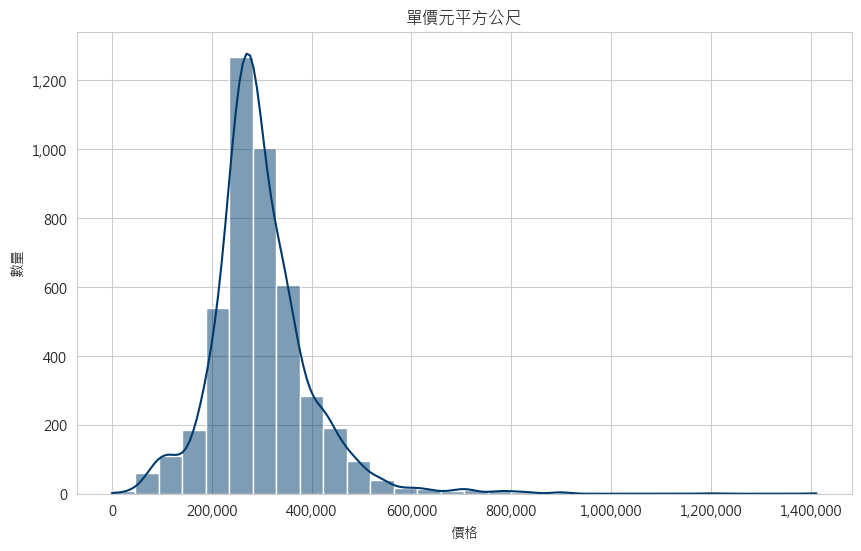

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(daan_data, x='單價元平方公尺', bins=30, kde=True,
             color='#003a6d')
plt.title('單價元平方公尺')
plt.xlabel('價格')
plt.ylabel('數量')

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Correlation Matrix
可以從圖中空白處發現當中有些欄位得值全部為0，或是完全一樣（里數），因此將這些欄位刪掉。

/Users/vanessahuang/miniconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/vanessahuang/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


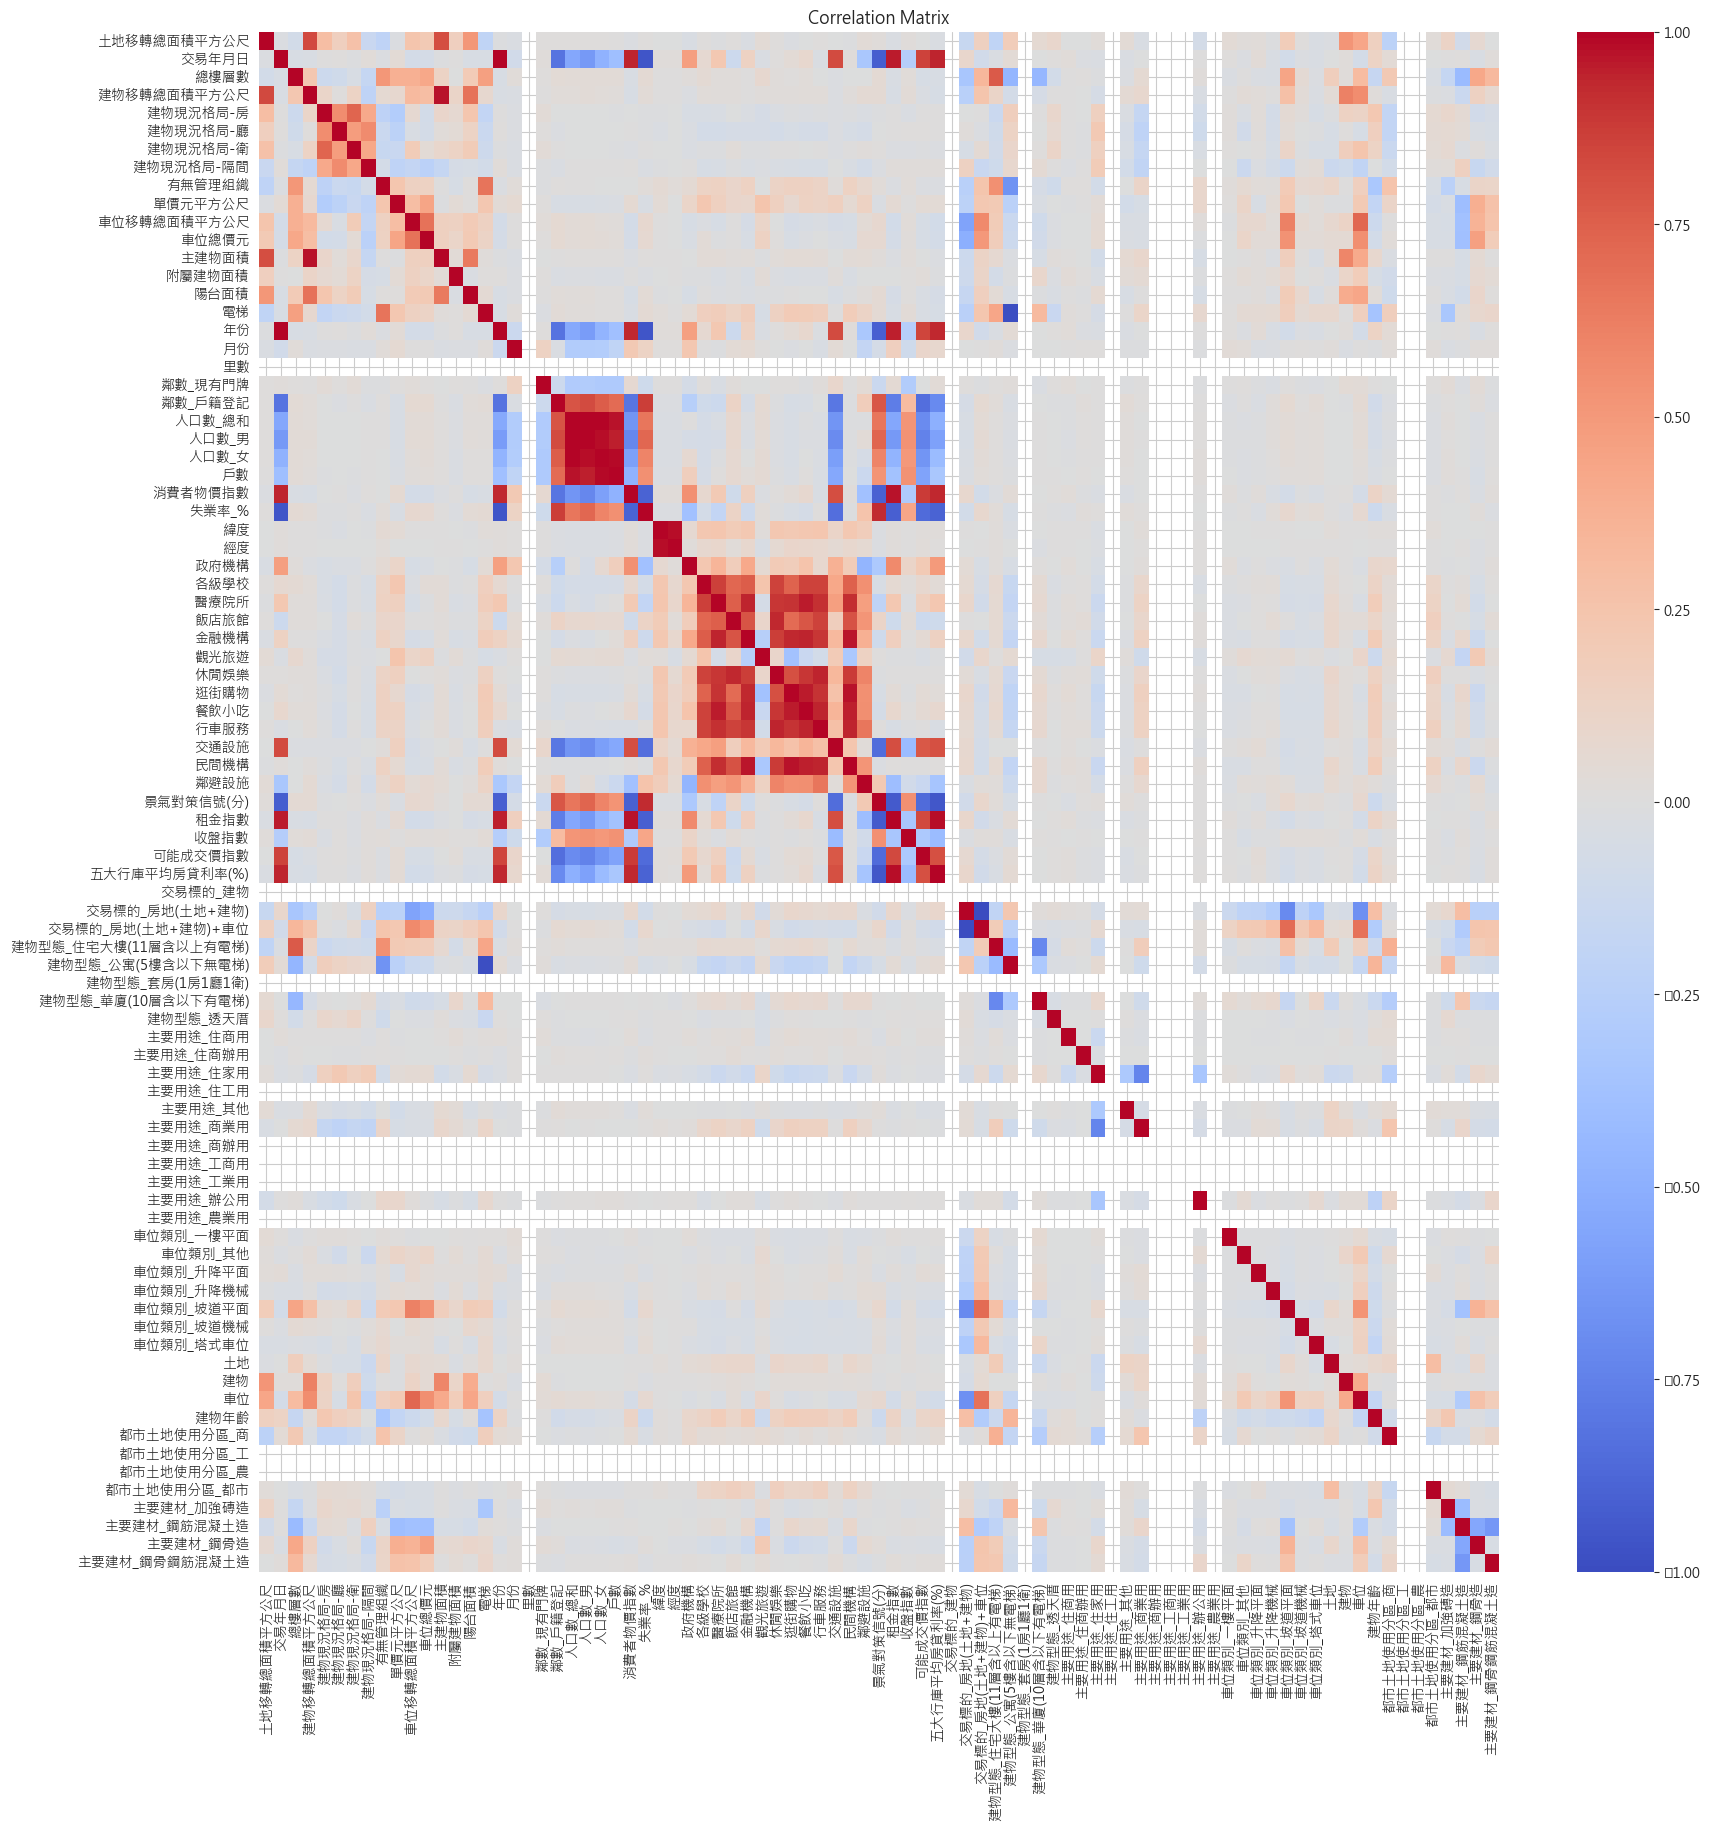

In [104]:
correlation_matrix = daan_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [105]:
# Drop the columns that are not needed
daan_data = daan_data.drop(columns = ['里數','交易標的_建物','建物型態_套房(1房1廳1衛)','主要用途_住工用','主要用途_商辦用','主要用途_工商用','主要用途_工業用','主要用途_農業用','都市土地使用分區_工','都市土地使用分區_農'])

In [ ]:
daan_data.to_csv('data/daan_data_cleaned.csv', index=False)

/Users/vanessahuang/miniconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/vanessahuang/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


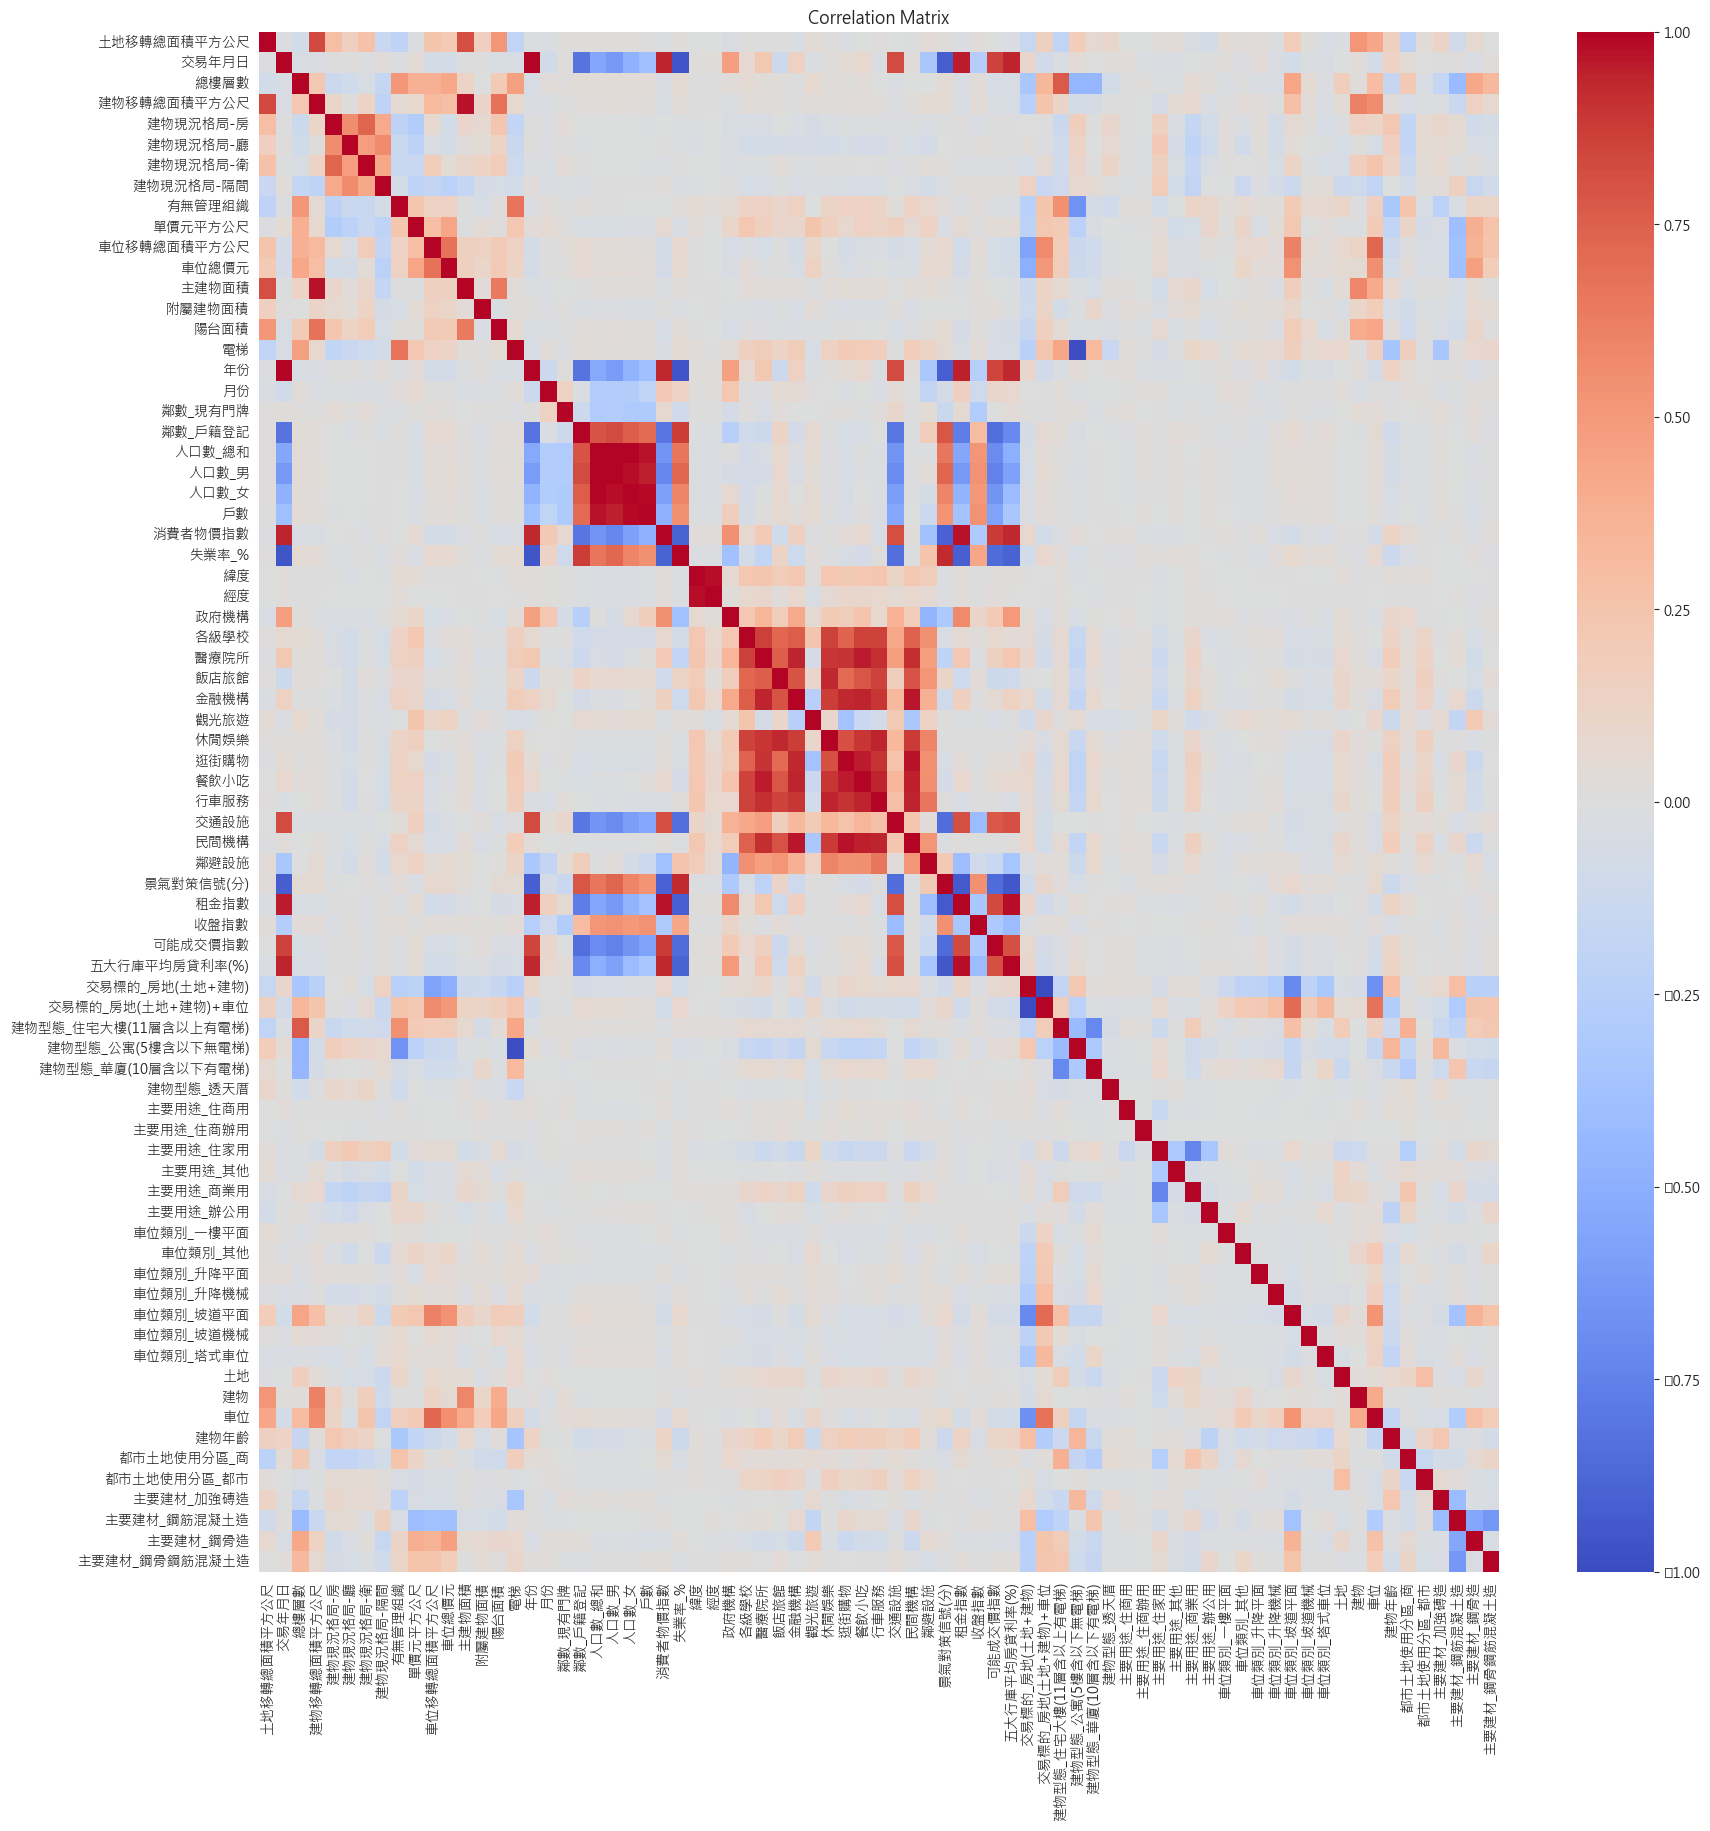

In [106]:
correlation_matrix = daan_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation between target variable and feature variables
- 鋼骨鋼筋混凝土（SRC）：建造成本高、花費時間久，多用於 15 ～ 25 層樓的建築
- 鋼筋混凝土（RC）：施工複雜程度最簡單，因為材料自重較重，因此最常見的為 10 層樓以下的中低層建築。

/Users/vanessahuang/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


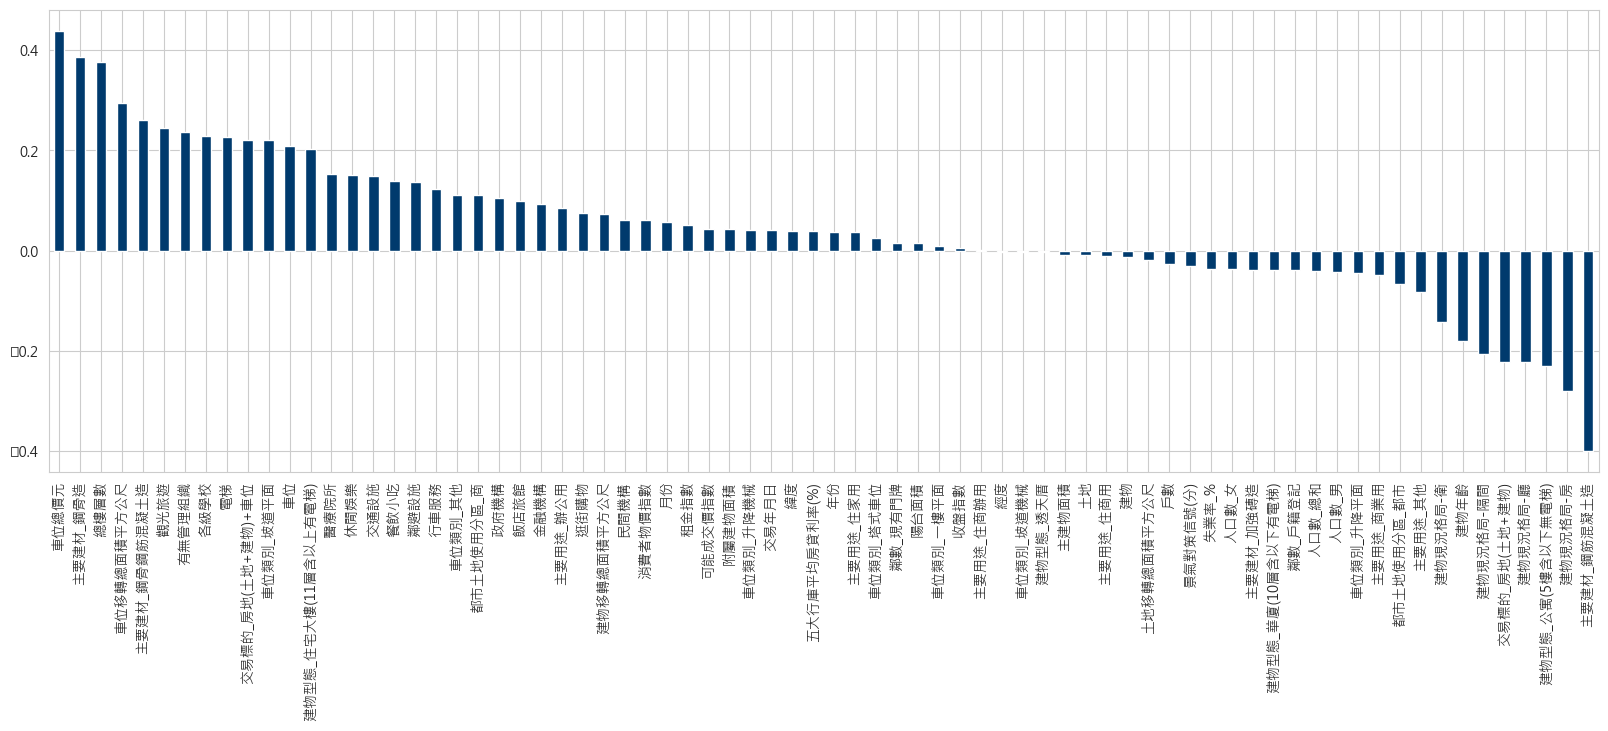

In [107]:
corr_with_sale_price = daan_data.corr()["單價元平方公尺"].sort_values(ascending=False)
plt.figure(figsize=(20,6))
corr_with_sale_price.drop("單價元平方公尺").plot.bar(color='#003a6d')
plt.show()

In [117]:
# Compute the correlation matrix
correlation_matrix = daan_data.corr()

# Isolate the correlations with the target variable
target_correlations = correlation_matrix["單價元平方公尺"]

# Drop the target variable correlation with itself
target_correlations = target_correlations.drop(labels=["單價元平方公尺"])

# Sort the correlations by absolute value in descending order
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

# Print the top 20 sorted correlations
print(sorted_correlations.head(30))

車位總價元                   0.438373
主要建材_鋼筋混凝土造             0.399229
主要建材_鋼骨造                0.385896
總樓層數                    0.376544
車位移轉總面積平方公尺             0.294068
建物現況格局-房                0.279645
主要建材_鋼骨鋼筋混凝土造           0.261261
觀光旅遊                    0.244519
有無管理組織                  0.235930
各級學校                    0.229419
建物型態_公寓(5樓含以下無電梯)       0.229147
電梯                      0.227001
建物現況格局-廳                0.221595
交易標的_房地(土地+建物)+車位       0.221008
交易標的_房地(土地+建物)          0.221008
車位類別_坡道平面               0.219843
車位                      0.208318
建物現況格局-隔間               0.206073
建物型態_住宅大樓(11層含以上有電梯)    0.203612
建物年齡                    0.179929
醫療院所                    0.152384
休閒娛樂                    0.151276
交通設施                    0.149813
建物現況格局-衛                0.141668
餐飲小吃                    0.138636
鄰避設施                    0.137969
行車服務                    0.122427
車位類別_其他                 0.110646
都市土地使用分區_商              0.110510
政府機構                    0.105255
Name: 單價元平

/var/folders/w5/mb61wl4x0m9d1tv76glq7dj80000gn/T/ipykernel_86891/2808435060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = daan_data.corr()


### Feature Selection – Xgboost

In [109]:
import xgboost as xgb
from xgboost import plot_importance

> **Split the data into training and testing**

In [110]:
daan_data['交易年月日'] = daan_data['交易年月日'].astype(str)
data_sorted = daan_data.sort_values(by='交易年月日')

# Calculate the index at which to split the data (80% for training, 20% for testing)
split_index = int(len(data_sorted) * 0.8)

# Split the DataFrame into training and testing sets
training_data = data_sorted[:split_index]
test_data = data_sorted[split_index:]

# Verify the split
print(f"Training data shape: {training_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (3562, 75)
Test data shape: (891, 75)


> **Convert 交易年月日 back to float**

In [111]:
training_data['交易年月日'] = training_data['交易年月日'].astype(float)
test_data['交易年月日'] = test_data['交易年月日'].astype(float)

/var/folders/w5/mb61wl4x0m9d1tv76glq7dj80000gn/T/ipykernel_86891/164823024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['交易年月日'] = training_data['交易年月日'].astype(float)
/var/folders/w5/mb61wl4x0m9d1tv76glq7dj80000gn/T/ipykernel_86891/164823024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['交易年月日'] = test_data['交易年月日'].astype(float)


> **Feature selection using xgboost**

importance type:
- `weight`: 特徵在所有樹中被選為分割點的次數。次數越多，通常意味著這個特徵越重要。
- `gain`: 特徵被用作分割點時，對模型預測效果的提升程度。增益越高，這個特徵在模型中的作用越大。
- `cover`: 每個特徵在分割點涵蓋的數據量。覆蓋範圍越大，顯示該特徵涉及更多數據信息。

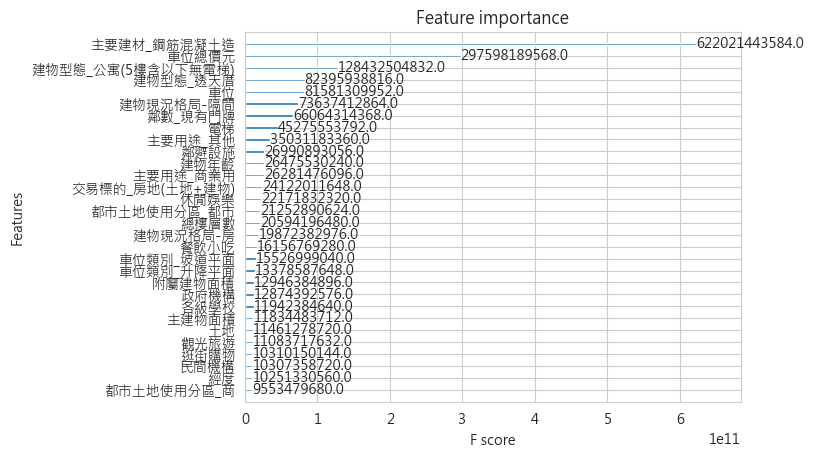

In [116]:
# Prepare your features and target variable
X_train = training_data.drop('單價元平方公尺', axis=1)
y_train = training_data['單價元平方公尺']
X_test = test_data.drop('單價元平方公尺', axis=1)
y_test = test_data['單價元平方公尺']

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Train the model
model.fit(X_train, y_train)

# Plot feature importance
# You can choose importance_type from 'weight', 'gain', or 'cover'
plot_importance(model, max_num_features=30, importance_type='gain')
plt.show()

### 把兩個 feature selection 做聯集合併

In [122]:
# Get top 30 features from correlation
top_corr_features = sorted_correlations.head(30).index.tolist()

# Get feature importances from XGBoost and get the top 20
xgb_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_xgb_features = xgb_importances.head(30).index.tolist()

# Union of both sets (聯集)
union_features = list(set(top_corr_features) | set(top_xgb_features))

print(union_features)

['建物型態_透天厝', '車位類別_坡道平面', '建物現況格局-房', '總樓層數', '車位類別_其他', '交易標的_房地(土地+建物)+車位', '休閒娛樂', '鄰避設施', '各級學校', '主要用途_商業用', '主要建材_鋼筋混凝土造', '車位總價元', '醫療院所', '主要建材_鋼骨鋼筋混凝土造', '行車服務', '交易標的_房地(土地+建物)', '觀光旅遊', '建物年齡', '主建物面積', '逛街購物', '車位', '政府機構', '經度', '主要建材_鋼骨造', '車位移轉總面積平方公尺', '建物現況格局-隔間', '都市土地使用分區_商', '電梯', '建物現況格局-衛', '餐飲小吃', '建物現況格局-廳', '土地', '建物型態_住宅大樓(11層含以上有電梯)', '交通設施', '主要用途_其他', '建物型態_公寓(5樓含以下無電梯)', '附屬建物面積', '民間機構', '有無管理組織', '鄰數_現有門牌', '都市土地使用分區_都市', '車位類別_升降平面']


### Construct the new dataset

In [128]:
# Include the target variable in the list of features to select
features_to_select = union_features + ['單價元平方公尺'] + ['交易年月日']

# Create a new DataFrame with only the selected features
daan_data_selected_features = daan_data[features_to_select]

# Verify the structure of the new DataFrame
daan_data_selected_features

daan_data_selected_features.to_csv('data/daan_selected.csv', index=False)